# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app", worker_id=1, seed=1)

Mono path[0] = '/Users/ckirby/Nextcloud/git/rl-collab-compete/Tennis.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/ckirby/Nextcloud/git/rl-collab-compete/Tennis.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.63803244 -1.5
 -0.          0.          6.00063038  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
best_score = 0.0
scores = []
scores_avg = []
solved = None

def maddpg(n_episodes=500, max_t=1000, print_every=100):
    global best_score
    global scores
    global scores_avg
    global solved
    scores_deque = deque(maxlen=print_every)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations
        agent.reset()
        # score = 0
        score = np.zeros(2)
        for t in range(max_t):
            # print(state)
            action = agent.act(state)
            # print(action)
            env_info = env.step(action)[brain_name]              # send the action to the environment
            next_state = env_info.vector_observations            # get the next state
            reward = env_info.rewards
            # reward = 0.1 if env_info.rewards[0] > 0.0 else 0.0   # get the reward
            # print(env_info.rewards)
            done = env_info.local_done
            agent.step(state[0], action[0], reward[0], next_state[0], done[0])
            agent.step(state[1], action[1], reward[1], next_state[1], done[1])
            state = next_state
            # score += np.max(reward)
            score += reward
            if np.any(done):
                break 
            # time.sleep(1)
            
            
        # print(score)
        score = np.max(score)
        scores_deque.append(score)
        scores.append(score)
        avg_score = np.mean(scores_deque)
        scores_avg.append(avg_score)
        
        if score > best_score:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, avg_score))
            torch.save(agent.policy_actor.state_dict(), 'model_actor-best_score.pth')
            torch.save(agent.value_critic.state_dict(), 'model_critic-best_score.pth')
            best_score = score
        else:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, avg_score), end="")

        if i_episode % print_every == 0:
            
            try:
                critic_loss = agent.critic_losses[-1]
            except:
                critic_loss = 0.0
            print('\rEpisode {}\tAverage Score: {:.4f}\t Critic loss: {:.4f}\tBuffer: {}'.format(i_episode, avg_score, critic_loss, len(agent.buffer)))
            # torch.save(agent.policy_actor.state_dict(), 'model_actor-{}.pth'.format(i_episode))
            # torch.save(agent.value_critic.state_dict(), 'model_critic-{}.pth'.format(i_episode))

        # if avg_score >= 0.5 and i_episode % 100 == 0:
        #     torch.save(agent.policy_actor.state_dict(), 'model_actor-{}.pth'.format(i_episode))
        #     torch.save(agent.value_critic.state_dict(), 'model_critic-{}.pth'.format(i_episode))
            
        if not solved and avg_score >= 0.5: 
            print('\rEpisode {}\tAverage Score: {:.4f}\tSOLVED'.format(i_episode, avg_score))
            solved = True
            torch.save(agent.policy_actor.state_dict(), 'model_actor-solved-{}.pth'.format(i_episode))
            torch.save(agent.value_critic.state_dict(), 'model_critic-solved-{}.pth'.format(i_episode))
            
    return scores, scores_avg



In [8]:
from agent import Agent, Params
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ckirby/.pyenv/versions/dlr/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [9]:
AGENT_CNT = 2
BATCH_SIZE = 1028
GAMMA = 0.99
TAU = 1e-3
LR_ACTOR = 1e-4
LR_CRITIC = 5e-4
STATE_DIM = 24
ACTION_CNT = 2
TARGET_UPDATE_STEP = 50
SEED = 0

params = Params(AGENT_CNT, BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, STATE_DIM, ACTION_CNT, TARGET_UPDATE_STEP, SEED)
agent = Agent(params)
# scores, scores_avg = ddpg(2000)

In [27]:
scores, scores_avg = maddpg(5000)

/Users/ckirby/.pyenv/versions/dlr/lib/python3.9/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Users/ckirby/Nextcloud/git/rl-collab-compete/agent.py:172: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.value_critic.parameters(), 1)


Episode 100	Average Score: 0.0589	 Critic loss: 0.0000	Buffer: 20000
Episode 163	Average Score: 0.0615
Episode 200	Average Score: 0.0610	 Critic loss: 0.0000	Buffer: 20000
Episode 300	Average Score: 0.0557	 Critic loss: 0.0000	Buffer: 20000
Episode 400	Average Score: 0.0789	 Critic loss: 0.0000	Buffer: 20000
Episode 500	Average Score: 0.0852	 Critic loss: 0.0000	Buffer: 20000
Episode 547	Average Score: 0.0910
Episode 600	Average Score: 0.0806	 Critic loss: 0.0000	Buffer: 20000
Episode 681	Average Score: 0.0895
Episode 700	Average Score: 0.0904	 Critic loss: 0.0000	Buffer: 20000
Episode 800	Average Score: 0.0996	 Critic loss: 0.0000	Buffer: 20000
Episode 898	Average Score: 0.1136
Episode 900	Average Score: 0.1126	 Critic loss: 0.0000	Buffer: 20000
Episode 989	Average Score: 0.1287
Episode 1000	Average Score: 0.1299	 Critic loss: 0.0000	Buffer: 20000
Episode 1009	Average Score: 0.1360
Episode 1100	Average Score: 0.1518	 Critic loss: 0.0000	Buffer: 20000
Episode 1154	Average Score: 0.1398

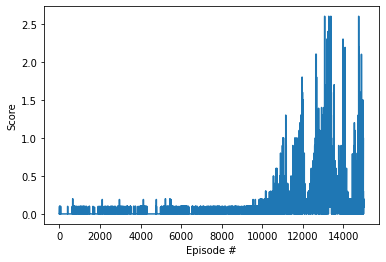

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('plot.png')
plt.show()

In [29]:
len(agent.buffer)

20000

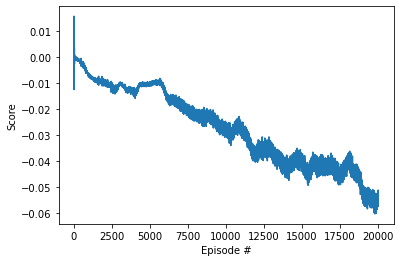

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(agent.actor_losses)+1), agent.actor_losses)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('plot.png')
plt.show()

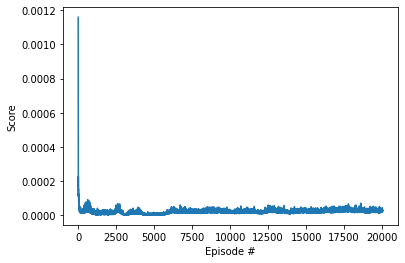

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(agent.critic_losses)+1), agent.critic_losses)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('plot.png')
plt.show()

In [15]:
# Eventually trains after 20k episodes
AGENT_CNT = 2
BATCH_SIZE = 64
GAMMA = 0.95
TAU = 1e-3
LR_ACTOR = 1e-4
LR_CRITIC = 5e-4
STATE_DIM = 24
ACTION_CNT = 2
TARGET_UPDATE_STEP = 5
SEED = 0

In [20]:
history = []
history_avg = []

In [32]:
history += scores
history_avg += scores_avg

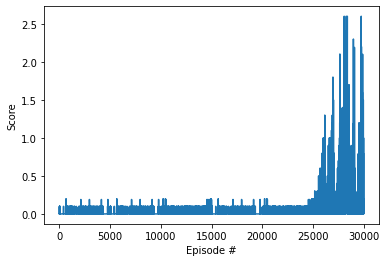

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(history)+1), history)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('plot.png')
plt.show()